In [100]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import copy 
import torch.optim as optim
import tqdm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [39]:
data = pd.read_csv('apple_quality.csv')

In [40]:
data.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [41]:
for i in range (0, len(data['Quality'])):
    if data['Quality'].iloc[i] == 'good':
        data['Quality'].iloc[i] = 1
    else:
        data['Quality'].iloc[i] = 0

C:\Users\neuropromotion\AppData\Local\Temp\ipykernel_5204\353247264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quality'].iloc[i] = 1
C:\Users\neuropromotion\AppData\Local\Temp\ipykernel_5204\353247264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quality'].iloc[i] = 0


In [42]:
data = data.drop('A_id', axis=1)

In [43]:
data.head(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [44]:
data.dropna()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


In [45]:
data.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [58]:
temp = data['Acidity']
temp = temp[0:4000]
temp = pd.to_numeric(temp)
temp

0      -0.491590
1      -0.722809
2       2.621636
3       0.790723
4       0.501984
          ...   
3995    0.137784
3996    1.854235
3997   -1.334611
3998   -2.229720
3999    1.599796
Name: Acidity, Length: 4000, dtype: float64

In [64]:
data['Acidity'] = temp
data.tail(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,1
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [66]:
data = data.dropna()

In [67]:
data.tail(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,1


In [68]:
data.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [69]:
y = data['Quality']
X = data.drop('Quality', axis = 1)

In [70]:
X.shape

(4000, 7)

In [71]:
y.shape

(4000,)

In [72]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

In [73]:
X

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [74]:
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [80]:
y_test = pd.to_numeric(y_test, downcast='float')

In [86]:
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

C:\Users\neuropromotion\AppData\Local\Temp\ipykernel_5204\4286338359.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\neuropromotion\AppData\Local\Temp\ipykernel_5204\4286338359.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
C:\Users\neuropromotion\AppData\Local\Temp\ipykernel_5204\4286338359.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


In [90]:
#model definition

model = nn.Sequential(
    nn.Linear(7, 24),
    nn.ReLU(),
    nn.Linear(24,24),
    nn.ReLU(),
    nn.Linear(24,12),
    nn.ReLU(),
    nn.Linear(12,6),
    nn.ReLU(),
    nn.Linear(6,1),
    nn.Sigmoid()
)

In [102]:
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epoches = 50
batch_size = 10
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_acc = - np.inf   # init to negative infinity
best_weights = None
history = []

In [103]:
for epoch in range(0, n_epoches):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
        bar.set_description(f"Epoch {epoch}")
        
        for start in bar:
            # take a batch:
            X_batch = X_train[start:start+batch_size]
            Y_batch = y_train[start:start+batch_size]
            
            #forward pass:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, Y_batch)
            
            #backward pass:
            optimizer.zero_grad()
            loss.backward()
            
            #updating weights:
            optimizer.step()
            
            #print:
            acc = (y_pred.round() == Y_batch).float().mean() 
            bar.set_postfix(
                    loss=float(loss),
                    acc=float(acc)
                )
        model.eval
        y_pred = model(X_test)
        acc = (y_pred.round() == y_test).float().mean()
        acc = float(acc)
        history.append(acc)
        if acc > best_acc:
            beat_acc = acc
            best_weights = copy.deepcopy(model.state_dict())
            
        # restore model and return best accuracy
        model.load_state_dict(best_weights) 
        

Epoch 49: 100%|█████████████████████████████████████████████| 280/280 [00:01<00:00, 174.14batch/s, acc=0.9, loss=0.186]


In [104]:
from sklearn.metrics import roc_curve

[ 0.106782   -0.34959817 -2.2380676  -1.8869611   2.2177715   1.152764
  1.2009796 ] -> [0.00044852] (expected [0.])
[-1.1411726e+00  7.7658838e-01  9.3090165e-01 -4.5315248e-01
  6.3012874e-01  4.8522841e-02 -3.6594106e-04] -> [0.41890973] (expected [0.])
[-0.42371947  1.3609234   0.5620335   2.6471968  -2.0608468   0.23245066
 -1.1315827 ] -> [0.00388418] (expected [0.])
[ 0.29310206 -2.098551    1.3124763   0.50183123  0.34682164  0.95618933
  0.20762196] -> [0.99981934] (expected [1.])
[-1.9425384   0.6280222   1.4750131   0.5458739  -0.89982516 -0.46515203
  0.9289772 ] -> [0.00131247] (expected [0.])


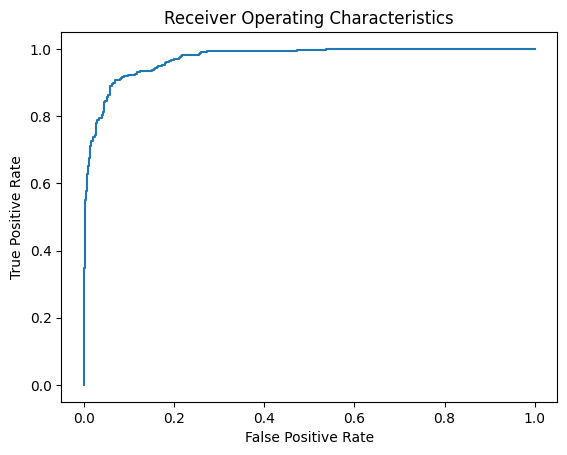

In [105]:
model.eval()
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(5):
        y_pred = model(X_test[i:i+1])
        print(f"{X_test[i].numpy()} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")

    # Plot the ROC curve
    y_pred = model(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr) # ROC curve = TPR vs FPR
    plt.title("Receiver Operating Characteristics")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()